In [1]:
#load our friends
import numpy as np
import math as mt 
import lmfit
import csv
import scipy.stats as sta
import matplotlib.pyplot as plt
from lmfit import Minimizer, Parameters
from lmfit.lineshapes import gaussian
from lmfit.printfuncs import report_fit

In [2]:
#define a polynomial with a guassian
def polgaus(x, p0, p1, p2, p3, p4, p5, norm, mu, sigma):
    pols=[p0,p1,p2,p3,p4,p5]
    y = norm*(np.exp(-np.power((x-mu),2.)/(2.*sigma**2)))+ np.polyval(pols,x)
    return y

#define just a polynomial
def polback(x, p0, p1, p2, p3, p4, p5):
    pols=[p0,p1,p2,p3,p4,p5]
    y = np.polyval(pols,x)
    return y

In [6]:
#run the fit
def fitFile(label,mu=90,vary_mu=True):
    x = []
    y = []
    y_err = []
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            if float(row[1]) < 50:
                    continue
            x.append(float(row[1]))
            y.append(float(row[2]))
            #add poisson uncertainties                                                                                                                                                                                                       
            y_err.append(mt.sqrt(float(row[2])))
    #Dumb trick to get uncertaities                                                                                                                                                                                                           
    weights = np.linspace(0.,len(y),num=len(y))
    for i0 in range(len(y)):
        weights[i0] = float(1./y_err[i0])
    #Now setup the fit (for signal+background)
    model = lmfit.Model(polgaus)
    p = model.make_params(p0=-3.48924610e-06,p1=2.79987292e-03,p2=-9.00945726e-01,p3=1.45645139e+02,p4=-1.18689484e+04,p5=3.92197860e+05,norm=3.53117893e+01,mu=mu,sigma=2.5)
    p['mu'].set(vary=vary_mu)
    result = model.fit(data=y, params=p, x=x, weights=weights)
    #plt.figure()
    labels_x = "mass[GeV]"
    labels_y = "Entries/bin"
    #result.plot()
    #plt.xlabel(labels_x,position=(0.92,0.1))
    #plt.ylabel(labels_y,position=(0.1,0.84))
    #print result.fit_report()
    return result.chisqr

#run the fit background only
def fitFileBack(label):
    x = []
    y = []
    y_err = []
    with open(label,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=' ')
        for row in plots:
            if float(row[1]) < 50:
                    continue
            x.append(float(row[1]))
            y.append(float(row[2]))
            #add poisson uncertainties                                                                                                                                                                                                       
            y_err.append(mt.sqrt(float(row[2])))
    #Dumb trick to get uncertaities                                                                                                                                                                                                           
    weights = np.linspace(0.,len(y),num=len(y))
    for i0 in range(len(y)):
        weights[i0] = float(1./y_err[i0])
    #Now setup the fit (for background only)
    modelback  = lmfit.Model(polback)
    pback     = modelback.make_params(p0=-3.48924610e-06,p1=2.79987292e-03,p2=-9.00945726e-01,p3=1.45645139e+02,p4=-1.18689484e+04,p5=3.92197860e+05)
    resultback = modelback.fit(data=y, params=pback, x=x, weights=weights)
    #lmfit.report_fit(resultback)
    #Now do the same thing for signal
    plt.figure()
    labels_x = "mass[GeV]"
    labels_y = "Entries/bin"
    plt.xlabel(labels_x,position=(0.92,0.1))
    plt.ylabel(labels_y,position=(0.1,0.84))
    return resultback.chisqr

27.923484361355566

<Figure size 432x288 with 0 Axes>

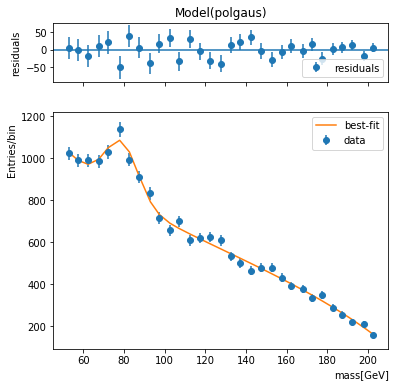

In [4]:
fitFile("data/vqq.txt")

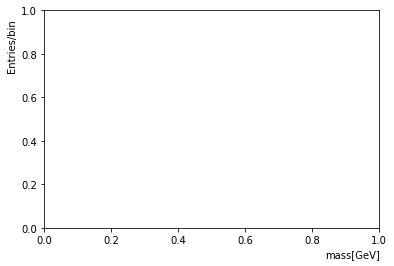

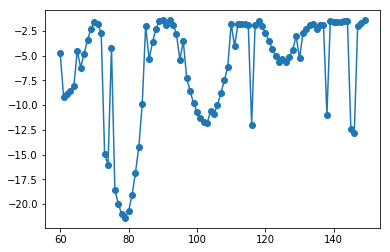

In [8]:
mass=[]
chi2=[]
chi2valBack=fitFileBack("data/vqq.txt")
for i in range(60,150):
    chi2valSig=fitFile("data/vqq.txt",i,False)
    chi2.append(mt.log(sta.chi2.pdf(abs(chi2valSig-chi2valBack),3)))
    #chi2.append(chi2valSig-chi2valBack)
    mass.append(i)
plt.figure()
plt.plot(mass,chi2, 'o-')